In [1]:
import torch
import torchvision
from sklearn.model_selection import train_test_split

# Download MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=None, target_transform=None, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=None, target_transform=None, download=True)

In [2]:
# Convert PyTorch tensors to numpy arrays
X_train = train_dataset.data.numpy()
y_train = train_dataset.targets.numpy()
X_test = test_dataset.data.numpy()
y_test = test_dataset.targets.numpy()

# Reshape the images to 28x28 format
X_train = X_train.reshape(-1, 28, 28)
X_test = X_test.reshape(-1, 28, 28)

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10000, random_state=42)

<font size='10'>First feature selection method based on selecting 10x10 array, centrally positioned from full 28x28 array.</font>

In [3]:
# reduce the dimension of 28x28 to 10x10 -> indexes are X(10,20), Y(10,20)
def reduceVectorTo10x10(elem):
    arr = []
    for i in range(10,20):
        for j in range(10,20):
            arr.append(elem[i][j])
    # coonvert to numpy array for future processing
    res = np.array(arr)
#     # reshape it to 10x10 image
#     res = res.reshape(-1, 10, 10)
    return res

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
X_train10x10 = list(range(len(X_train)))
X_test10x10 = list(range(len(X_test)))

for index, value in enumerate(X_train):
    X_train10x10[index] = reduceVectorTo10x10(value)
    
for index, value in enumerate(X_test):
    X_test10x10[index] = reduceVectorTo10x10(value)

In [22]:
from sklearn.model_selection import GridSearchCV

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [1, 5, 25, 50],
    'weights': ['uniform', 'distance'],
}

gridKnn = GridSearchCV(knn, param_grid, scoring='accuracy', cv=5)

In [9]:
gridKnn.fit(X_train10x10, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 5, 25, 50],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [10]:
import pandas as pd

cv_results = pd.DataFrame(gridKnn.cv_results_)
print(cv_results[['params', 'mean_test_score', 'std_test_score']])

                                       params  mean_test_score  std_test_score
0    {'n_neighbors': 1, 'weights': 'uniform'}          0.86634        0.001527
1   {'n_neighbors': 1, 'weights': 'distance'}          0.86634        0.001527
2    {'n_neighbors': 5, 'weights': 'uniform'}          0.87614        0.002001
3   {'n_neighbors': 5, 'weights': 'distance'}          0.87834        0.001489
4   {'n_neighbors': 25, 'weights': 'uniform'}          0.86192        0.001258
5  {'n_neighbors': 25, 'weights': 'distance'}          0.86484        0.001001
6   {'n_neighbors': 50, 'weights': 'uniform'}          0.84824        0.002245
7  {'n_neighbors': 50, 'weights': 'distance'}          0.85176        0.002330


In [12]:
knnPredictions = gridKnn.best_estimator_.predict(X_test10x10)

In [10]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [14]:
print("Accuracy: " + str(accuracy_score(y_test, knnPredictions)))
print("Precision(weighted): " + str(precision_score(y_test, knnPredictions, average='weighted')))
print("Precision(macro): " + str(precision_score(y_test, knnPredictions, average='macro')))
print("Recall(weighted): " + str(recall_score(y_test, knnPredictions, average='weighted')))
print("Recall(macro): " + str(recall_score(y_test, knnPredictions, average='macro')))
print("F1(weighted): " + str(f1_score(y_test, knnPredictions, average='weighted')))
print("F1(macro): " + str(f1_score(y_test, knnPredictions, average='macro')))

Accuracy: 0.8785
Precision(weighted): 0.8784946104786255
Precision(macro): 0.878625220197628
Recall(weighted): 0.8785
Recall(macro): 0.8774916307289923
F1(weighted): 0.8780150912507104
F1(macro): 0.8775911682974442


In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

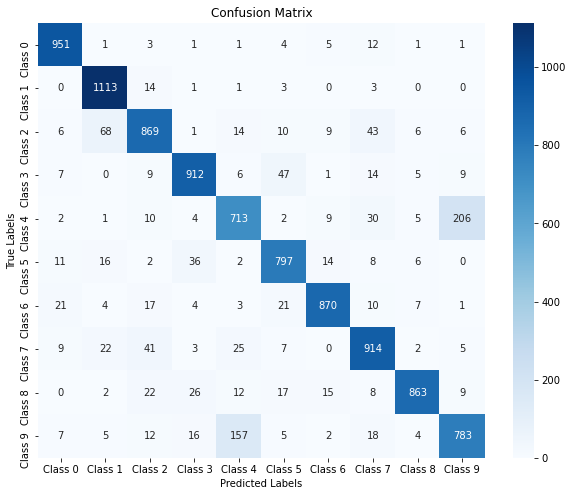

In [16]:
cm = confusion_matrix(y_test, knnPredictions)
# Define class labels
classes = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']
# Set the size of the figure
fig, ax = plt.subplots(figsize=(10, 8))

# Create heatmap using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes, ax=ax)
# Add labels and title to plot
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display plot
plt.show()

In [17]:
indexes = []
for i in range(len(y_test)):
    if y_test[i] != knnPredictions[i]:
        indexes.append(i)
        break
for i in range(len(y_test)):
    if y_test[-i] != knnPredictions[-i]:
        indexes.append(-i)
        break

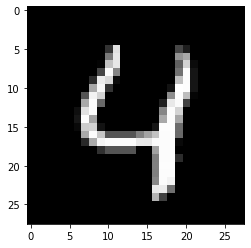

In [18]:
plt.imshow(X_test[indexes[0]], cmap='gray')
plt.show()

In [19]:
print(knnPredictions[indexes[0]])

9


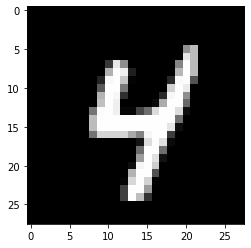

In [20]:
plt.imshow(X_test[indexes[1]], cmap='gray')
plt.show()

In [21]:
print(knnPredictions[indexes[1]])

9


In [20]:
from sklearn.neural_network import MLPClassifier

In [23]:
# Create an instance of the MLPClassifier
mlp = MLPClassifier(max_iter=1000)

param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'logistic', 'tanh'],
    'solver': ['sgd', 'adam'],
}

gridMLP = GridSearchCV(mlp, param_grid, scoring='accuracy', cv=5)

In [24]:
gridMLP.fit(X_train10x10, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000),
             param_grid={'activation': ['relu', 'logistic', 'tanh'],
                         'hidden_layer_sizes': [(10,), (50,), (100,)],
                         'solver': ['sgd', 'adam']},
             scoring='accuracy')

In [25]:
# Print the best hyperparameters and score
print("Best parameters: ", gridMLP.best_params_)
print("Best accuracy score: ", gridMLP.best_score_)

Best parameters:  {'activation': 'relu', 'hidden_layer_sizes': (100,), 'solver': 'adam'}
Best accuracy score:  0.87436


In [27]:
import pandas as pd

In [28]:
cv_results = pd.DataFrame(gridMLP.cv_results_)
print(cv_results[['params', 'mean_test_score']])

                                               params  mean_test_score
0   {'activation': 'relu', 'hidden_layer_sizes': (...          0.41048
1   {'activation': 'relu', 'hidden_layer_sizes': (...          0.76140
2   {'activation': 'relu', 'hidden_layer_sizes': (...          0.75560
3   {'activation': 'relu', 'hidden_layer_sizes': (...          0.86098
4   {'activation': 'relu', 'hidden_layer_sizes': (...          0.82982
5   {'activation': 'relu', 'hidden_layer_sizes': (...          0.87436
6   {'activation': 'logistic', 'hidden_layer_sizes...          0.73202
7   {'activation': 'logistic', 'hidden_layer_sizes...          0.75664
8   {'activation': 'logistic', 'hidden_layer_sizes...          0.84836
9   {'activation': 'logistic', 'hidden_layer_sizes...          0.84930
10  {'activation': 'logistic', 'hidden_layer_sizes...          0.87002
11  {'activation': 'logistic', 'hidden_layer_sizes...          0.87096
12  {'activation': 'tanh', 'hidden_layer_sizes': (...          0.72210
13  {'

In [29]:
cv_results.to_csv('MLP.txt', sep='\t', index=False)

In [30]:
mlpPredictions = gridMLP.best_estimator_.predict(X_test10x10)

In [31]:
print("Accuracy: " + str(accuracy_score(y_test, mlpPredictions)))
print("Precision(weighted): " + str(precision_score(y_test, mlpPredictions, average='weighted')))
print("Precision(macro): " + str(precision_score(y_test, mlpPredictions, average='macro')))
print("Recall(weighted): " + str(recall_score(y_test, mlpPredictions, average='weighted')))
print("Recall(macro): " + str(recall_score(y_test, mlpPredictions, average='macro')))
print("F1(weighted): " + str(f1_score(y_test, mlpPredictions, average='weighted')))
print("F1(macro): " + str(f1_score(y_test, mlpPredictions, average='macro')))

Accuracy: 0.8761
Precision(weighted): 0.8791174730704286
Precision(macro): 0.8788785387227049
Recall(weighted): 0.8761
Recall(macro): 0.8747052227270402
F1(weighted): 0.8748996245125252
F1(macro): 0.8740667364211889


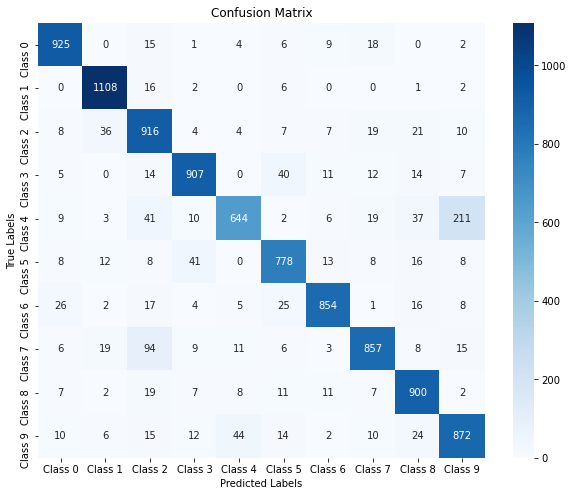

In [32]:
cm = confusion_matrix(y_test, mlpPredictions)
# Define class labels
classes = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']
# Set the size of the figure
fig, ax = plt.subplots(figsize=(10, 8))

# Create heatmap using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes, ax=ax)
# Add labels and title to plot
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display plot
plt.show()

In [33]:
indexes = []
for i in range(len(y_test)):
    if y_test[i] != mlpPredictions[i]:
        indexes.append(i)
        break
for i in range(len(y_test)):
    if y_test[-i] != mlpPredictions[-i]:
        indexes.append(-i)
        break

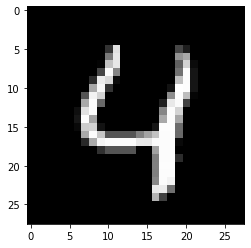

In [34]:
plt.imshow(X_test[indexes[0]], cmap='gray')
plt.show()

In [35]:
print(mlpPredictions[indexes[0]])

9


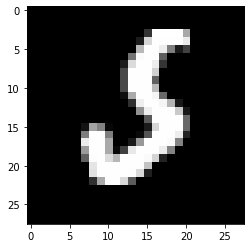

In [36]:
plt.imshow(X_test[indexes[1]], cmap='gray')
plt.show()

In [37]:
print(mlpPredictions[indexes[1]])

2


In [22]:
from sklearn.svm import SVC

In [23]:
# Create an instance of the MLPClassifier
svc = SVC()

param_grid = {
    'C': [1, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}

gridSVC2 = GridSearchCV(svc, param_grid, scoring='accuracy', cv=5)

In [16]:
gridSVC2.fit(X_train10x10, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 100], 'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [17]:
cv_results = pd.DataFrame(gridSVC2.cv_results_)
print(cv_results[['params', 'mean_test_score']])

                            params  mean_test_score
0       {'C': 1, 'kernel': 'poly'}          0.91392
1        {'C': 1, 'kernel': 'rbf'}          0.91286
2    {'C': 1, 'kernel': 'sigmoid'}          0.43846
3     {'C': 100, 'kernel': 'poly'}          0.90666
4      {'C': 100, 'kernel': 'rbf'}          0.91940
5  {'C': 100, 'kernel': 'sigmoid'}          0.43424


In [18]:
svc3 = SVC(C=10, kernel='rbf')

In [19]:
svc3.fit(X_train10x10, y_train)

SVC(C=10)

In [20]:
svmPredictions = svc3.predict(X_test10x10)

In [23]:
print("Accuracy: " + str(accuracy_score(y_test, svmPredictions)))
print("Precision(weighted): " + str(precision_score(y_test, svmPredictions, average='weighted')))
print("Precision(macro): " + str(precision_score(y_test, svmPredictions, average='macro')))
print("Recall(weighted): " + str(recall_score(y_test, svmPredictions, average='weighted')))
print("Recall(macro): " + str(recall_score(y_test, svmPredictions, average='macro')))
print("F1(weighted): " + str(f1_score(y_test, svmPredictions, average='weighted')))
print("F1(macro): " + str(f1_score(y_test, svmPredictions, average='macro')))

Accuracy: 0.9296
Precision(weighted): 0.9295030711744284
Precision(macro): 0.9295694637151268
Recall(weighted): 0.9296
Recall(macro): 0.929008372533669
F1(weighted): 0.929435368560513
F1(macro): 0.9291785229188434


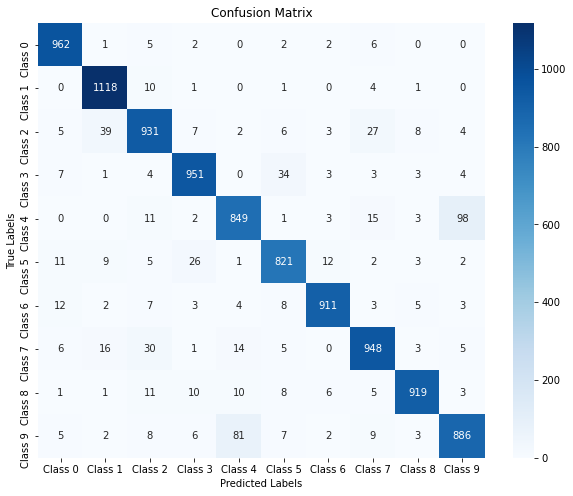

In [26]:
cm = confusion_matrix(y_test, svmPredictions)
# Define class labels
classes = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']
# Set the size of the figure
fig, ax = plt.subplots(figsize=(10, 8))

# Create heatmap using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes, ax=ax)
# Add labels and title to plot
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display plot
plt.show()

In [27]:
indexes = []
for i in range(len(y_test)):
    if y_test[i] != svmPredictions[i]:
        indexes.append(i)
        break
for i in range(len(y_test)):
    if y_test[-i] != svmPredictions[-i]:
        indexes.append(-i)
        break

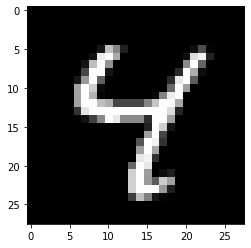

In [28]:
plt.imshow(X_test[indexes[0]], cmap='gray')
plt.show()

In [29]:
print(svmPredictions[indexes[0]])

9


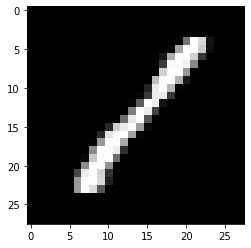

In [30]:
plt.imshow(X_test[indexes[1]], cmap='gray')
plt.show()

In [31]:
print(svmPredictions[indexes[1]])

2
